### Linear Regression and Train/Test Split challenges


Ideally, try these with your own data! (Alternatively, there is the
`2013_movies.csv` data set.)

In [230]:
import pandas as pd
import numpy as np
import re
import statsmodels.formula.api as smf

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, LassoCV, lars_path
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
plt.style.use('seaborn-white')

In [60]:
# Read Amzn Data
df = pd.read_csv('./amazon_data/clean_amazon_data.csv')

In [61]:
df = df.drop(['Brand', 'Name', 'Url', 'styles', 'volume_dimensions', 'rank_category', 'asin', 'volume_unit', 'max_price'], axis=1).copy()

In [216]:
df['log_rank'] = np.log(df['amazon_rank'])

In [172]:
df['constant'] = 1

In [177]:
df = df.drop(['volume'], axis=1)

In [178]:
df = df.dropna()

In [ ]:
# Create categorical column
df['styles'] = (df['style_count'] > 1).map({True: 'Multiple', False: 'Single'})

In [295]:
X = df.drop(['amazon_rank'], axis=1)

In [296]:
y = df['amazon_rank']

#### Challenge 1

Build a linear model that uses only a constant term (a column of ones) to predict a continuous outcome (like domestic total gross). How can you interpret the results of this model? What does it predict? Make a plot of predictions against actual outcome. Make a histogram of residuals. How are the residuals distributed?




In [219]:
model = smf.ols('log_rank ~ constant', data=df, missing='drop').fit()

In [221]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               log_rank   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       inf
Date:                Sun, 04 Feb 2018   Prob (F-statistic):                nan
Time:                        21:38:05   Log-Likelihood:                -16766.
No. Observations:                9303   AIC:                         3.353e+04
Df Residuals:                    9302   BIC:                         3.354e+04
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7873      0.008    892.402      0.000       6.772       6.802
constant       6.7873      0.008    892.402      0.000       6.772       6.802
==============================================================================
Omnibus:                     1209.318   Durbin-Watson:                   0.486
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1957.059
Skew:                          -0.902   Prob(JB):                         0.00
Kurtosis:                       4.341   Cond. No.                     3.12e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.91e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

The results of this model will predict the average value

In [222]:
y_pred = model.predict(X)

In [223]:
resid = y - y_pred

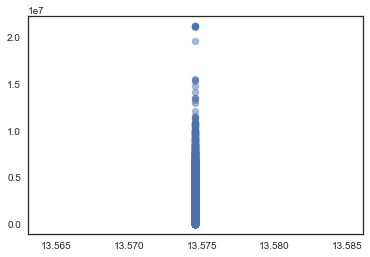

In [225]:
plt.scatter(y_pred, resid, alpha = 0.5)

#### Challenge 2

Repeat the process of challenge one, but also add one continuous (numeric) predictor variable. Also add plots of model prediction against your feature variable and residuals against feature variable. How can you interpret what's happening in the model?


In [241]:
model2 = LinearRegression()

In [242]:
model2.fit(X[['Rating', 'constant']], y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [302]:
y_pred_2 = model2.predict(X[['Rating', 'constant']])

In [303]:
resid_2 = y - y_pred_2

Text(23.025,0.5,'Predicted Ranking')

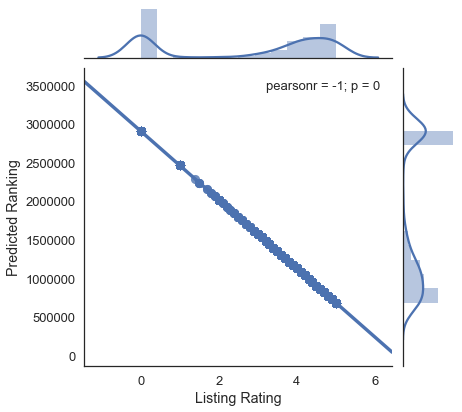

In [304]:
sns.jointplot(x=X['Rating'], y=y_pred_2, kind='regplot')
sns.set_context('talk')
plt.xlabel('Listing Rating');
plt.ylabel('Predicted Ranking')

Here's a single feature against the predicted ranking. It's a straight line because there's only one linear coefficient, and thus the relationship is a line.

Text(23.025,0.5,'Residual')

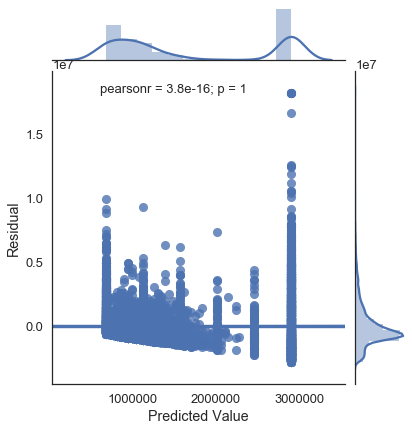

In [259]:
sns.jointplot(x=y_pred_2, y=resid_2, kind='regplot')
sns.set_context('talk')
plt.xlabel('Predicted Value');
plt.ylabel('Residual')

#### Challenge 3

Repeat the process of challenge 1, but add a categorical feature (like genre). You'll have to convert a column of text into a number of numerical columns ("dummy variables"). How can you interpret what's happening in the model?



In [297]:
model3 = LinearRegression()

In [298]:
X = pd.get_dummies(X)

In [301]:
model3.fit(X[['Rating', 'styles_Multiple', 'styles_Single', 'constant']], y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [307]:
y_pred_3 = model3.predict(X[['Rating', 'styles_Multiple', 'styles_Single', 'constant']])

In [308]:
resid_3 = y - y_pred_3

Text(23.025,0.5,'Residual')

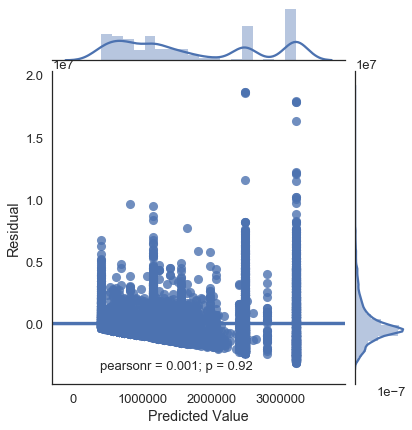

In [309]:
sns.jointplot(x=y_pred_3, y=resid_3, kind='regplot')
sns.set_context('talk')
plt.xlabel('Predicted Value');
plt.ylabel('Residual')

With categorical variables, the coefficients tell us how much that specific category will impact the prediction.

#### Challenge 4

Enhance your model further by adding more features and/or transforming existing features. Think about how you build the model matrix and how to interpret what the model is doing.


 Already did this for my luther project

#### Challenge 5

Fitting and checking predictions on the exact same data set can be
misleading. Divide your data into two sets: a training and a test set
(roughly 75% training, 25% test is a fine split). Fit a model on the
training set, check the predictions (by plotting versus actual values)
in the test set.


 Already did this for my luther project